In [1]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

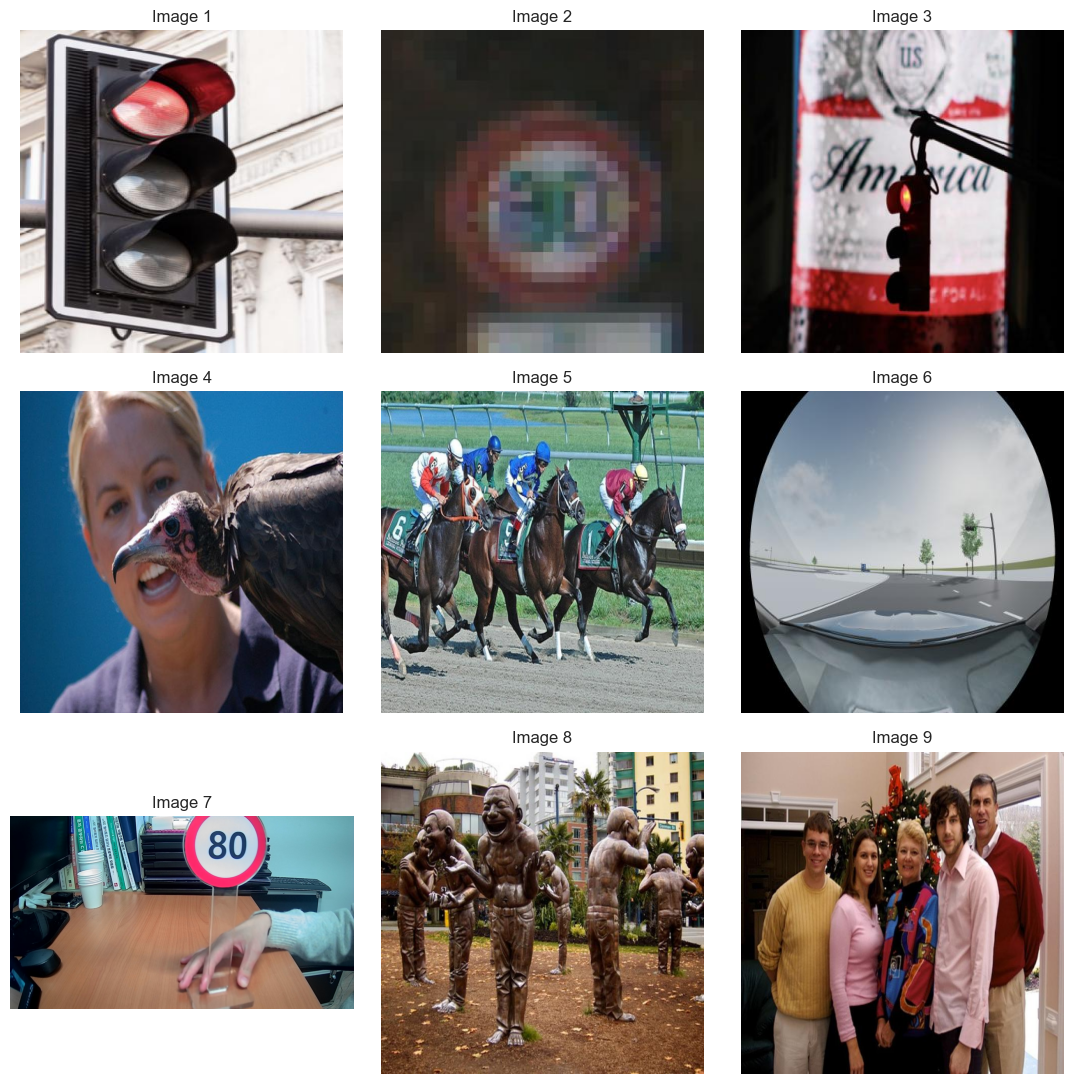

In [3]:
Image_dir = os.getcwd()+'/data/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Get the size of the image
image = cv2.imread(Image_dir+"/40_sign_00021.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\images\40_sign_00021.jpg: 640x640 (no detections), 6.7ms
Speed: 4.9ms preprocess, 6.7ms inference, 21.9ms postprocess per image at shape (1, 3, 640, 640)


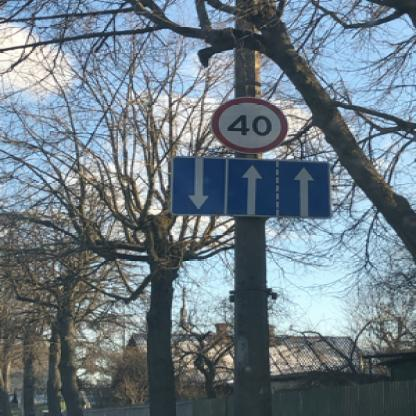

In [5]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = Image_dir+"/40_sign_00021.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [6]:
!pip install --upgrade ultralytics ray

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached ultralytics_thop-2.0.12-py3-none-any.whl.metadata (9.4 kB)
   ---------------------------------------- 0.0/887.5 kB ? eta -:--:--
   -- ------------------------------------- 61.4/887.5 kB 1.6 MB/s eta 0:00:01
   -------- ------------------------------- 184.3/887.5 kB 2.2 MB/s eta 0:00:01
   -------- ------------------------------- 184.3/887.5 kB 2.2 MB/s eta 0:00:01
   ---------------- ----------------------- 358.4/887.5 kB 2.0 MB/s eta 0:00:01
   -------------------- ------------------- 450.6/887.5 kB 2.0 MB/s eta 0:00:01
   ---------------------------- ----------- 624.6/887.5 kB 2.5 MB/s eta 0:00:01
   ------------------------------------ --- 809.0/887.5 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 887.5/887.5 kB 2

In [10]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data=os.getcwd()+"/data/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

New https://pypi.org/project/ultralytics/8.3.37 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.35  Python-3.9.20 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject/data/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

2024-11-26 15:00:28,489	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\train\labels... 3834 imag


train: New cache created: C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\train\labels.cache
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU) 8.00G total, 0.24G reserved, 0.08G allocated, 7.68G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3012408       8.202         0.428         65.72         241.1        (1, 3, 640, 640)                    list
     3012408        16.4         0.451         66.51         79.21        (2, 3, 640, 640)                    list
     3012408       32.81         0.694          98.5          98.2        (4, 3, 640, 640)                    list
     3012408       65.61         1.193         112.4         72.53        (8, 3, 640, 640)                    list
     3012408       131.2         2.097         55.69         99.86       (16, 3, 640, 640)            

train: Scanning C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\train\labels.cache... 383
val: Scanning C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\valid\labels... 210 images,

val: New cache created: C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\valid\labels.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000578125), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.87G      1.116      2.721      1.297         77        640: 100%|██████████| 104/104 [00:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all        210        314      0.478       0.41      0.464      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.88G      1.156      1.923       1.32         63        640: 100%|██████████| 104/104 [00:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all        210        314      0.628      0.509      0.492      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       4.9G      1.174      1.706       1.33         54        640: 100%|██████████| 104/104 [00:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all        210        314      0.618       0.54      0.593      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       4.9G      1.149      1.526      1.322         58        640: 100%|██████████| 104/104 [00:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0

                   all        210        314       0.52      0.735      0.677      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.86G      1.145      1.395      1.309         92        640:  69%|██████▉   | 72/104 [00:17<00:07,  4


KeyboardInterrupt: 